<a href="https://colab.research.google.com/github/ktarun1681/Customer-Segmentation-Using-K-Means-Clustering/blob/main/Customer_Segmentation_Using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Segmentation Using K-Means Clustering(Unsupervised Machine Learning Algorithm):

The Steps that we need to follow to use this K-Means Clustering are as follows:

1. Firstly, We need to collect the data.
2. The next step is Data pre-processing.
3. Next we do data analysis.
4. Then we find the optimum number of clusters.
5. Then we feed our data to K-Means Clustering Algorithm.
6. Then we visualise the clusters.

In [2]:
#importing the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and Analysis:

In [8]:
cs_df = pd.read_csv('/content/drive/MyDrive/Datasets/Mall_Customers.csv')

In [9]:
#printing the first five rows of the data set
cs_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
#getting the info about the data
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
#finding the number of rows and columns
cs_df.shape

(200, 5)

In [17]:
cs_df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Choosing the Annual Income column and the Spending column:

In [18]:
X = cs_df.iloc[:,[3,4]].values

In [ ]:
print(X)

Choosing the number of clusters

WCSS --> Within Clusters Sum of Squares

In [21]:
#finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=4)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

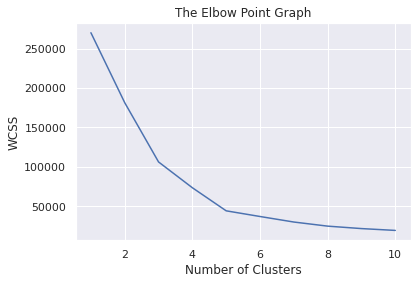

In [23]:
#plotting an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters will be 5 As we can see from the graph as there is no significant drop in the values after that. While at the other elbow point which is 3 ,the drop is significant.


Training the K-Means Clustering Model:

In [25]:
kmeans  = KMeans(n_clusters=5, init= 'k-means++', random_state=0)

#return a label for each data points for each cluster

Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualizing all the clusters

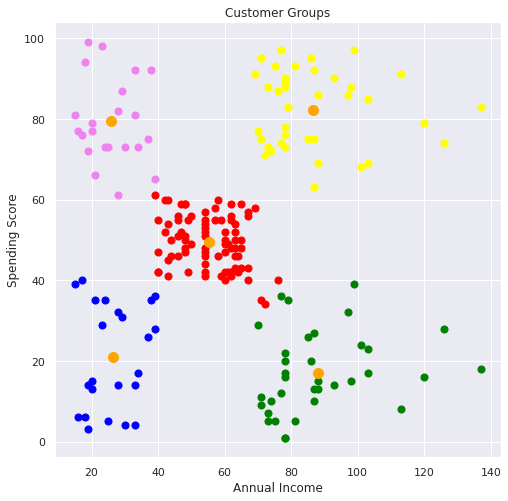

In [33]:
 #plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

#plotting the centroids

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c= 'orange', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()